 # 1. Identify the problem

This image set is of a Transfluor assay where an orphan GPCR is stably integrated into the b-arrestin GFP expressing U2OS cell line. After one hour incubation with a compound the cells were fixed with (formaldehyde).

![](./exercises/svm/images/images.png)

## 1.1 Objective

Since the labels in the data are discrete, the prediction falls into two categories, (i.e. Postive cell or Negative Cell). In machine learning this is a classification problem.    
> Thus, the goal is to classify whether cell  is positive or negative and predict the accuracy of the model with different kernel.

## 1.2 Identify data source

We used image set [BBBC016v1](https://data.broadinstitute.org/bbbc/BBBC016/) provided by Ilya Ravkin, available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012].   
We used a part of this dataset taking account the wells O06, O07, O16 and O22.    
Features were generated by CellProfiler and classes were annotated manually. The dataset contains **40 samples of positives and negatives cells**.
* The first two columns in the dataset contain the *labels* (Positives, Negatives), and the *dose* put for each well.
* The columns 4 - 5 contain the well position on the plate, the unique ID of the image and the number of object respectively.
* The columns 6 - 155 contain *features* that have been computed from images of the cell nuclei and cell cytoplasm which can be used to build a model to predict the phenotype of the cells.

## 1.3 Load libraries

In [1]:
# a) Importing libraries.
import numpy as np

# b) Replace the occurences of ... to import the pandas library with the clause import. 
... ... as pd

Ellipsis

In [2]:
import numpy as np
import pandas as pd

## 1.4 Load dataset

In [ ]:
# c) Importing the dataset.

# Replace the occurences of ... to indicate a string path to your file (ie dataset.csv). 
# Example A local file could be: "C://localhost/path/to/table.csv".
file = ...

# Replace the occurences of ... to load the dataset.csv file (path assigned previously) 
# using the Pandas read_csv function. 
dataset = ...

In [3]:
file = "/home/cedric/Documents/ML_FormationBC/exercises/svm/features/dataset.csv"
dataset = pd.read_csv(file)

## 1.5 Inspecting the data

The first step is to visually inspect the dataset. There are multiple ways to achieve this:
* The easiest being to request the first few records using the data.head() method. By default, “data.head()” returns the first 5 rows.
* Alternatively, one can also use “data.tail()” to return the five rows of the data.
* For both head and tail methods, there is an option to specify the number of rows by including the required number in between the parentheses when calling either method.

In [ ]:
# d) print the dataset.
# After reading the notes above try to display the ten rows of the dataset. Fill in the occurences of ...
...

In [4]:
dataset.head(n=10)

,Label,Dose,Well,ImageNumber,ObjectNumber,Cytoplasm_AreaShape_Area,Cytoplasm_AreaShape_Center_X,Cytoplasm_AreaShape_Center_Y,Cytoplasm_AreaShape_Center_Z,Cytoplasm_AreaShape_Compactness,...,Nuclei_Intensity_UpperQuartileIntensity_GFP,Nuclei_Location_CenterMassIntensity_X_GFP,Nuclei_Location_CenterMassIntensity_Y_GFP,Nuclei_Location_CenterMassIntensity_Z_GFP,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Nuclei_Location_Center_Z,Nuclei_Location_MaxIntensity_X_GFP,Nuclei_Location_MaxIntensity_Y_GFP,Nuclei_Location_MaxIntensity_Z_GFP
0,positive,30uM,O06,16,1,637,511,25,1,1.879897,...,0.082353,494.622708,20.047603,0,494.581250,20.540625,0,492,11,0
1,positive,30uM,O06,16,2,595,130,9,1,2.651236,...,0.098039,132.456736,23.939163,0,132.921824,25.127036,0,130,16,0
2,positive,30uM,O06,16,3,1148,364,45,1,1.868392,...,0.136275,373.332682,36.815090,0,377.064990,37.368973,0,365,38,0
3,positive,30uM,O06,16,4,850,46,32,1,2.217524,...,0.058824,59.206182,36.540153,0,59.150826,36.756198,0,68,38,0
4,positive,30uM,O06,16,5,572,95,30,1,2.119470,...,0.074510,86.828216,46.826942,0,85.625316,49.878481,0,93,42,0
5,positive,30uM,O06,16,6,863,237,46,1,1.915221,...,0.054902,243.537824,31.963731,0,244.105023,32.054795,0,236,31,0
6,positive,30uM,O06,16,7,1168,226,66,1,2.005247,...,0.070588,207.154417,45.389293,0,205.145238,42.564286,0,214,58,0
7,positive,30uM,O06,16,8,1296,310,51,1,1.965571,...,0.113725,323.864183,48.170581,0,326.627706,49.259740,0,316,50,0
8,positive,30uM,O06,16,9,2396,440,63,1,1.446313,...,0.282353,418.243703,55.920201,0,412.717899,58.832685,0,423,52,0
9,positive,30uM,O06,16,10,950,181,74,1,1.631683,...,0.066667,161.211885,78.871986,0,160.745238,77.454762,0,155,86,0


You can check the number of cases, as well as the number of fields, using the shape method.

In [ ]:
# e) Replace the occurence ... by the shape method to get the number of rows and number of columns
...

In [6]:
dataset.shape

(40, 155)

In the result displayed, you should be have 40 records with 155 columns.   
The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [ ]:
# f) Replace the occurence ... by the "info(verbose = True)" to get the data type of each column
...

In [17]:
dataset.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 155 entries, Label to Nuclei_Location_MaxIntensity_Z_GFP
dtypes: float64(126), int64(26), object(3)
memory usage: 48.5+ KB


From the results above Label, Dose and Well are *categorical variables* and rest are floating or integer values.

# 2. Pre-processing the dataset

Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use. This involves a number of activities such as:
* Assigning numerical values to categorical data.
* Handling missing values.
* Divide data into attributes and labels sets.
* Divide data into traininig and test sets.

## 2.1 Objective

> The goal here is encoding the class Label in an array y and get attributes in an array X. Then split the data into a *training set* and *testing set*.

## 2.2 split features and labels into new sets and encoding the labels into integers 

In [ ]:
# a) Use the method drop(columns=['feature_1', "feature_2", ...]) 
# to drop unnecessary features 'Label', 'Dose', 'Well', 'ImageNumber', 'ObjectNumber'
# and affect the output to X variable
... = ...

# b) For select a feature use data['feature']. Replace the occurence ... to select the Label feature
y = ...

#transform the class labels from their original string representation (positive and negative) into integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

# c) Replace the occurence ... to display 5 rows of the X dataset with head() method
print(..., y)

> After encoding the Label in an array y, the phenotype cell are now represented as class 1(i.e positive cell) and as class 0 (i.e negative cell), respectively.

In [23]:
X = dataset.drop(columns=['Label', 'Dose', 'Well', 'ImageNumber', 'ObjectNumber'])
y = dataset['Label']

#transform the class labels from their original string representation (positive and negative) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(X.head(), y)

   Cytoplasm_AreaShape_Area  Cytoplasm_AreaShape_Center_X  \
0                       637                           511   
1                       595                           130   
2                      1148                           364   
3                       850                            46   
4                       572                            95   

   Cytoplasm_AreaShape_Center_Y  Cytoplasm_AreaShape_Center_Z  \
0                            25                             1   
1                             9                             1   
2                            45                             1   
3                            32                             1   
4                            30                             1   

   Cytoplasm_AreaShape_Compactness  Cytoplasm_AreaShape_Eccentricity  \
0                         1.879897                          0.577598   
1                         2.651236                          0.603286   
2                         

## 2.3 Split data into training and test sets

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here 
* Split the available data into a training set and a testing set. (70% training, 30% test)

In [ ]:
# a) Use the train_test_split method from the model.selection of scikit-learn.
# Import the train_test_split method
# This method takes three parameters train_test_split(param1, param2, param3). 
# The first parameter will be the X dataset, the second parameter will be the y dataset 
# and the third parameter will be the size of the testing set ie (70% = 0.70).
# Fill in the occurences ...

from sklearn.model_selection import ...

X_train, X_test, y_train, y_test = train_test_split(..., ..., test_size = ...)

# b) Fill in the occurences ... to display the number of rows 
# and numbers of columns for the two variables (X_train and X_test)
...

In [24]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train.shape, X_test.shape

((28, 150), (12, 150))

# 3. Predictive model using Support Vector Machine (SVM)

Kernelized support vector machines are powerful models and perform well on a variety of datasets.

   1. SVMs allow for *complex decision boundaries*, even if the data has only a few features.

   2. They work well on *low-dimensional* and *high-dimensional* data (i.e., few and many features), but don’t scale very well with the number of samples.

   3. SVMs requires careful *preprocessing of the data* and *tuning* of the parameters. This is why, these days, most people instead use tree-based models such as *random forests* or *gradient boosting* (which require little or no preprocessing) in many applications.
   
   4. SVM models are *hard to inspect*; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a non-expert.


## 3.1 Objective

> The goal is to fit a linear model to the data using *SVC library* from the svm of scikit-learn.

In [ ]:
# Follow the instructions and fill in the occurences ...

# a) Create an SVM classifier and train it on 70% of the data set.
# use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. 
# This class takes one parameter, which is the kernel type 'linear'.
# We will see non-linear kernels in the next section.

from sklearn.svm import ...
svclassifier = ...(kernel= ... )

# b) The fit method of SVC class is called to train the algorithm on the training data (X_train, y_train), 
# which is passed as a parameter to the fit method.

...(... , ...)

From the above result you will see the important parameters in kernel SVMs:
* Regularization parameter C.

* The choice of the kernel (linear, radial basis function(RBF) or polynomial).

* Kernel-specific parameters.


In [25]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 3.2 Making predictions

To make predictions, the predict method of the SVC class is used.

In [ ]:
# a) Fill in the occurences to make prediction on the testing set (X_test) 
y_pred = ...(...)

In [29]:
y_pred = svclassifier.predict(X_test)

[0 1 0 0 0 1 1 1 1 1 0 0]


# 4. Model Accuracy

## 4.1 Confusion matrix

*Confusion matrix* measure is the most commonly used metric for classification tasks. Scikit-Learn's metrics library contains the confusion_matrix method, which can be readily used to find out the values for these important metrics.   
the confusion matrix that essentially is a *two-dimensional table* where the classifier model is on one axis (vertical), and ground truth is on the other (horizontal) axis, as shown below. Either of these axes can take two values (as depicted)   

Model says "+" | Model says "-" | Ground truth
---------------|----------------|-----------
`True positive`|`False negative`|Actual: "+"
`False positive`|`True negative`|  Actual: "-"

> The goal is to create a confusion matrix in order to know the accuracy of the model.

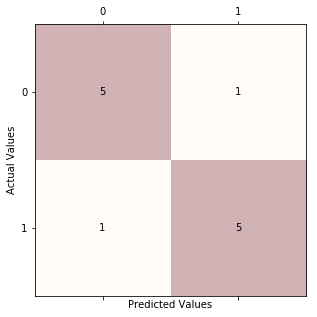

In [34]:
# a) fill in the occurences to import confusion_matrix method from sklearn.metrics

from ... import ...  
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

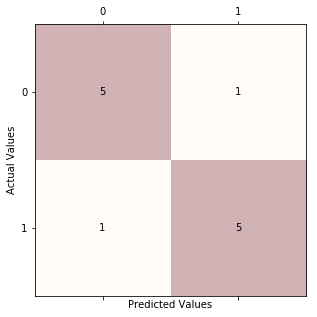

In [32]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

### Observation

There are two possible predicted classes: "1" (i.e positive cell) and "0" (i.e negative cell).

    a) How many positives cells are true ?   
    b) How many negatives cells are true ?    
    c) How many positives cells are false ?     
    d) How many negatives cells are false ?

## 4.2 Rates as computed from the confusion matrix 

a) **Accuracy**: Overall, how often is the classifier correct? Calculate the accuracy of the model in percentage   
     $Accuracy = (\frac{TP+TN}{TP+TN+FP+FN})*100$   
     $Accuracy = ... $%
 
b) **Misclassification Rate**: Overall, how often is it wrong? Calculate the "error rate" of the model in percentage
    $Error Rate = (\frac{FP+FN}{TP+TN+FP+FN})*100$   
    $Error Rate = ... $%

In [40]:
print("Accuracy", (5+5)/12*100)
print("Error rate", (1+1)/12*100)

Accuracy 83.33333333333334
Error rate 16.666666666666664


# 5 Comparison between different kernel for no linear classification

> We will implement polynomial, Gaussian, and sigmoid kernels to see which one works better for our problem.

## 5.1 Polynomial kernel

In [42]:
# a) Replace the 'linear' kernel parameter from the SVC class by 'poly'
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
svclassifier = SVC(kernel='poly')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# b) Make predictions on the testing set
...

In [45]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[0 1 0 0 0 1 1 1 1 1 0 0]


In [ ]:
# c) create a confusion matrix to evaluate the accuracy
...

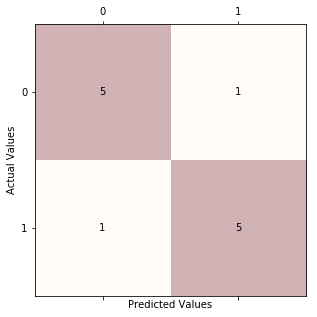

In [46]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

d) calculate the accuracy and the error rate of the polynomial model.
Accuracy = ...%     
Eror rate = ... %

e) Now let's repeat the same steps for *Gaussian* (kernel = 'rbf') and *sigmoid* kernels (kernel = 'sigmoid'). Which kernel work better for our problem ?
....

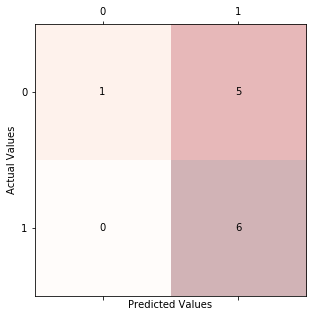

In [51]:
# Gauusian kernel

svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

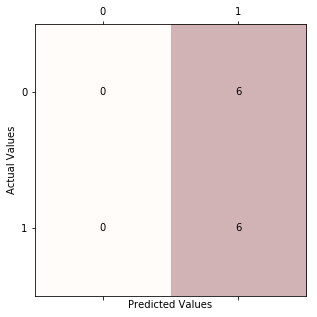

In [53]:
# sigmoid kernel

svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

### Observation

From the result above If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst.

# 6. Make prediction on new dataset (unlabel)

> the goal is to predict unlabel dataset with the best classifier run above

In [65]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# b) importing the new dataset (file: unlabel_dataset.csv)
new_data = ....

In [66]:
new_data = pd.read_csv('/home/cedric/Documents/ML_FormationBC/exercises/svm/features/unlabel_dataset.csv')

In [ ]:
# c) print the 8 rows of new_data
...

In [67]:
new_data.head(n=8)

,Dose,Well,ImageNumber,ObjectNumber,Cytoplasm_AreaShape_Area,Cytoplasm_AreaShape_Center_X,Cytoplasm_AreaShape_Center_Y,Cytoplasm_AreaShape_Center_Z,Cytoplasm_AreaShape_Compactness,Cytoplasm_AreaShape_Eccentricity,...,Nuclei_Intensity_UpperQuartileIntensity_GFP,Nuclei_Location_CenterMassIntensity_X_GFP,Nuclei_Location_CenterMassIntensity_Y_GFP,Nuclei_Location_CenterMassIntensity_Z_GFP,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Nuclei_Location_Center_Z,Nuclei_Location_MaxIntensity_X_GFP,Nuclei_Location_MaxIntensity_Y_GFP,Nuclei_Location_MaxIntensity_Z_GFP
0,30uM,O06,16,11,2376,281,100,1,1.493052,0.132448,...,0.090196,294.065957,84.277737,0,291.262443,82.278281,0,303,85,0
1,30uM,O06,16,12,3574,351,129,1,1.326023,0.715588,...,0.141176,375.140187,103.370691,0,373.988235,102.818824,0,380,106,0
2,30uM,O06,16,13,3753,510,111,1,1.344488,0.612820,...,0.266667,481.680890,102.978854,0,477.859177,106.181962,0,488,96,0
3,30uM,O06,16,14,2036,431,102,1,1.471101,0.794275,...,0.168627,423.362840,126.144813,0,421.512755,123.561224,0,424,127,0
4,30uM,O06,16,15,1484,104,107,1,1.814315,0.809661,...,0.109804,98.167940,121.203206,0,100.246512,120.232558,0,99,125,0
5,30uM,O06,16,16,4843,233,154,1,1.432419,0.802339,...,0.117647,224.432217,130.052040,0,227.017316,129.199134,0,217,132,0
6,30uM,O06,16,17,1575,444,155,1,1.561572,0.751373,...,0.352941,441.517093,129.590732,0,441.631455,131.107981,0,445,128,0
7,30uM,O06,16,18,5457,265,170,1,1.844564,0.910277,...,0.200000,288.999741,141.297450,0,287.883392,142.079505,0,284,142,0


In [ ]:
# d) drop unrelevant features like 'Dose', 'Well', 'ImageNumber', 'ObjectNumber'
new_data = ...

In [68]:
new_data = new_data.drop(columns=['Dose', 'Well', 'ImageNumber', 'ObjectNumber'])

In [ ]:
# e) prediction on the new_data
new_pred = ...

In [69]:
new_pred = svclassifier.predict(new_data)
print(new_pred)

[1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
